In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd

ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1',
                      usecols=['user_id', 'movie_id', 'user_emb_id', 'movie_emb_id', 'rating'])

movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1',
                     usecols=['movie_id', 'title', 'genres'])

In [3]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head(5)

,user_id,movie_id,rating,user_emb_id,movie_emb_id
0,1,1193,5,0,1192
1,1,661,3,0,660
2,1,914,3,0,913
3,1,3408,4,0,3407
4,1,2355,5,0,2354


### Content Based

**Objective**: Build a Content-Based Recommendation system that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre.

**Dataset**:
- **Movies Data**: DataFrame with columns `movie_id`, `title`, and `genres`.

**Steps**:

1. **Preprocess Data**:
   - Split the `genres` column into separate genre strings.
   - Fill any missing values in the `genres` column and convert it to string.

2. **Compute TF-IDF Matrix**:
   - Use `TfidfVectorizer` to transform the genres into a TF-IDF matrix.

3. **Calculate Cosine Similarity**:
   - Compute cosine similarity between the TF-IDF matrices of movies.

4. **Recommend Movies**:
   - Create a function that gets movie recommendations based on the cosine similarity score of movie genres.

In [5]:
movies['genres'] = movies['genres'].str.split('|')
movies['genres'] = movies['genres'].fillna("").astype('str')

In [6]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
4,5,Father of the Bride Part II (1995),['Comedy']


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])

In [8]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [9]:
def genre_recommendations(title, n=10):
    #TODO
    movie = movies[movies['title'] == title]
    if movie.empty: return "No Movies"
    sim_scores = list(enumerate(cosine_sim[movie.index[0]]))
    sim_scores.sort(key=lambda x: x[1], reverse=True)
    return movies['title'].iloc[[i[0] for i in sim_scores[1:n + 1]]]


In [10]:
# Example
genre_recommendations('GoldenEye (1995)')
#genre_recommendations('something_wrong (1995)')

345     Clear and Present Danger (1994)
543           Surviving the Game (1994)
724                    Rock, The (1996)
788                     Daylight (1996)
825               Chain Reaction (1996)
978                 Maximum Risk (1996)
1467                    Anaconda (1997)
1513                     Con Air (1997)
1693                   Firestorm (1998)
3686          Perfect Storm, The (2000)
Name: title, dtype: object


### Collaborative Filtering

**Objective**: Implement a collaborative filtering movie recommendation system to recommend movies to a user based on similar users' spreferences.

**Dataset**:

- **Ratings Data**: DataFrame with columns `user_id`, `movie_id`, and `rating`.
- **Movies Data**: DataFrame with columns `movie_id`, `title`, and `genres`.

**Steps**:

1. **Preprocess Data**:
   - Merge `ratings` and `movies` DataFrames on `movie_id`.
   - Split `genres` column into separate rows.

2. **Create User-Genre Matrix**:
   - Create a matrix where rows are users and columns are genres.
   - Each cell represents the ratio of movies watched by the user in that genre to the total movies watched by the user.

3. **Calculate User Similarity**:
   - Use cosine similarity to calculate the similarity between users.

4. **Find Top N Similar Users**:
   - Find the top N users with the most similar preferences to the given user.

5. **Recommend Movies**:
   - Recommend movies that similar users have watched but the target user has not.
   - Return titles and genres of the top 10 recommended movies.

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
data = pd.merge(ratings, movies, on='movie_id')

In [13]:
data.head(5)

,user_id,movie_id,rating,user_emb_id,movie_emb_id,title,genres
0,1,1193,5,0,1192,One Flew Over the Cuckoo's Nest (1975),['Drama']
1,1,661,3,0,660,James and the Giant Peach (1996),"['Animation', ""Children's"", 'Musical']"
2,1,914,3,0,913,My Fair Lady (1964),"['Musical', 'Romance']"
3,1,3408,4,0,3407,Erin Brockovich (2000),['Drama']
4,1,2355,5,0,2354,"Bug's Life, A (1998)","['Animation', ""Children's"", 'Comedy']"


In [14]:
data = data.explode('genres').reset_index(drop=True)
# this part seems to not do its job if i understand correctly but i couldn't fix it 

In [15]:
data.head(5)

,user_id,movie_id,rating,user_emb_id,movie_emb_id,title,genres
0,1,1193,5,0,1192,One Flew Over the Cuckoo's Nest (1975),['Drama']
1,1,661,3,0,660,James and the Giant Peach (1996),"['Animation', ""Children's"", 'Musical']"
2,1,914,3,0,913,My Fair Lady (1964),"['Musical', 'Romance']"
3,1,3408,4,0,3407,Erin Brockovich (2000),['Drama']
4,1,2355,5,0,2354,"Bug's Life, A (1998)","['Animation', ""Children's"", 'Comedy']"


In [16]:
# pre process 
user_genre = data.pivot_table(index='user_id', columns='genres', values='rating', aggfunc='mean').fillna(0)

user_sim = pd.DataFrame(cosine_similarity(user_genre, user_genre), columns=user_genre.index, index=user_genre.index)

#user_sim.head(5)

In [17]:
user_sim.shape

(6040, 6040)

In [18]:
def get_top_n_similar_users(user_id, n=5):
    #TODO
    return user_sim.loc[user_id].drop(user_id).sort_values(ascending=False)[
           0:n].index if user_id in user_sim.index else []

In [19]:
def recommend_movies(user_id, n_similar_users=5, n_recommendations=10):
    #TODO
    friends = get_top_n_similar_users(user_id, n=n_similar_users)
    recommend = []
    if len(friends) != 0:
        seen_movies = data[data['user_id'] == user_id]['movie_id'].tolist()
        friends_rating = data[data['user_id'].isin(friends)]

        filtered_friends_rating = friends_rating[~friends_rating['movie_id'].isin(seen_movies)]

        scoring_movies = filtered_friends_rating.groupby('movie_id')['rating'].mean()
        high_score_movies = scoring_movies.nlargest(n_recommendations).index
        # high_score_movies = scoring_movies.sort_values(ascending=False)[0:n_recommendations].index

        recommend = movies[movies['movie_id'].isin(high_score_movies)][['title', 'genres']]

    return recommend

In [20]:
# Example
user_id = 1
recommended_movies = recommend_movies(user_id, n_similar_users=5, n_recommendations=10)

In [21]:
recommended_movies

,title,genres
61,Mr. Holland's Opus (1995),['Drama']
108,Braveheart (1995),"['Action', 'Drama', 'War']"
258,Little Women (1994),['Drama']
293,Pulp Fiction (1994),"['Crime', 'Drama']"
535,Sleepless in Seattle (1993),"['Comedy', 'Romance']"
586,Dances with Wolves (1990),"['Adventure', 'Drama', 'Western']"
592,Pinocchio (1940),"['Animation', ""Children's""]"
887,Singin' in the Rain (1952),"['Musical', 'Romance']"
898,Some Like It Hot (1959),"['Comedy', 'Crime']"
906,Meet Me in St. Louis (1944),['Musical']


### SVD (Singular Value Decomposition)



**Objective**: Implement an SVD-based recommendation system to recommend movies to users by decomposing the user-item interaction matrix into latent factors.

**Dataset**:
- **Ratings Data**: DataFrame with columns `user_id`, `movie_id`, and `rating`.
- **Movies Data**: DataFrame with columns `movie_id`, `title`, and `genres`.

**Steps**:

1. **Preprocess Data**:
   - Merge `ratings` and `movies` DataFrames on `movie_id`.
   - Create a user-item matrix where rows represent users, columns represent movies, and the values are the ratings.

2. **Decompose Matrix using SVD**:
   - Apply Singular Value Decomposition (SVD) to decompose the user-item matrix into three matrices: $U$, $\Sigma$, and $V^T$.

3. **Reconstruct Matrix**:
   - Reconstruct the user-item matrix using the top $k$ singular values to reduce dimensionality.

4. **Predict Ratings**:
   - Use the reconstructed matrix to predict ratings for all user-item pairs.

5. **Recommend Movies**:
   - Recommend the top 20 movies with the highest predicted ratings for a given user that the user hasn't rated yet.

In [22]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 6040 | Number of movies = 3706


Fill na elements.

In [23]:
Ratings = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
#Ratings.head()
Ratings.shape

(6040, 3706)

In [24]:
def normalize(matrix, mean):
    return matrix - mean.reshape(-1, 1)

In [25]:
# calculate rating matrix ::: code was written 
# just in case ->
Ratings_df = Ratings
Ratings = Ratings.values
mean = np.mean(Ratings, axis=1)
# Ratings = normalize(Ratings, mean)

In [26]:
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(Ratings, k=100)  # TODO
sigma = np.diag(sigma)

In [27]:
all_user_predicted_ratings = (U @ sigma) @ Vt  # TODO
#all_user_predicted_ratings =  (U @ sigma) @ Vt + mean.reshape(-1, 1)# TODO

In [28]:
preds = pd.DataFrame(all_user_predicted_ratings, columns=Ratings_df.columns)

#preds.head()

In [29]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    user_row_number = userID - 1  # User ID starts at 1, not 0

    # TODO
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False)

    # TODO
    user_data = original_ratings[original_ratings.user_id == (userID)]

    # merge movies data with user_data
    # TODO
    user_full = user_data.merge(movies, left_on='movie_id', right_on='movie_id', how='left').sort_values(['rating'],
                                                                                                         ascending=False)

    print(f'User {userID} has already rated {user_full.shape[0]} movies.')
    print(f'Recommending highest {num_recommendations} predicted ratings movies not already rated.')

    # TODO
    not_rated = movies[~movies['movie_id'].isin(user_full['movie_id'])]
    user_preds = pd.DataFrame(sorted_user_predictions).reset_index()
    recommendations = not_rated.merge(user_preds,
                                      how='left',
                                      left_on='movie_id',
                                      right_on='movie_id').rename(columns={user_row_number: 'Predictions'}).sort_values(
        'Predictions', ascending=False).iloc[:num_recommendations, :-1]

    return user_full, recommendations

In [30]:
already_rated, predictions = recommend_movies(preds, 4375, movies, ratings, 20)

User 4375 has already rated 325 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [31]:
predictions["title"].head()

1239         Raising Arizona (1987)
470     Sleepless in Seattle (1993)
1479        Truman Show, The (1998)
3073          Grumpy Old Men (1993)
1398                 Contact (1997)
Name: title, dtype: object

In [32]:
ratings.head(20)

,user_id,movie_id,rating,user_emb_id,movie_emb_id
0,1,1193,5,0,1192
1,1,661,3,0,660
2,1,914,3,0,913
3,1,3408,4,0,3407
4,1,2355,5,0,2354
5,1,1197,3,0,1196
6,1,1287,5,0,1286
7,1,2804,5,0,2803
8,1,594,4,0,593
9,1,919,4,0,918


In [33]:
# Top 20 movies that User 4375 has rated
already_rated.head(20)

,user_id,movie_id,rating,user_emb_id,movie_emb_id,title,genres
195,4375,3250,5,4374,3249,Alive (1993),['Drama']
285,4375,175,5,4374,174,Kids (1995),['Drama']
199,4375,3257,5,4374,3256,"Bodyguard, The (1992)","['Action', 'Drama', 'Romance', 'Thriller']"
65,4375,3809,5,4374,3808,What About Bob? (1991),['Comedy']
210,4375,2688,5,4374,2687,"General's Daughter, The (1999)","['Drama', 'Thriller']"
270,4375,150,5,4374,149,Apollo 13 (1995),['Drama']
271,4375,2710,5,4374,2709,"Blair Witch Project, The (1999)",['Horror']
125,4375,349,5,4374,348,Clear and Present Danger (1994),"['Action', 'Adventure', 'Thriller']"
60,4375,288,5,4374,287,Natural Born Killers (1994),"['Action', 'Thriller']"
141,4375,47,5,4374,46,Seven (Se7en) (1995),"['Crime', 'Thriller']"


#### Evaluation

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# TODO
train_data, test_data = train_test_split(ratings, test_size=0.3)
# TODO
train_ratings = train_data.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
R_train = train_ratings.values

# TODO
user_ratings_mean_train = mean

Ratings_demeaned_train = R_train - user_ratings_mean_train.reshape(-1, 1)

# TODO
U_train, sigma_train, Vt_train = np.linalg.svd(R_train, full_matrices=False)
sigma_train = np.diag(sigma_train)

# TODO
all_user_predicted_ratings_train = (U_train @ sigma_train) @ Vt_train

# TODO
preds_train = pd.DataFrame(all_user_predicted_ratings_train, columns=train_ratings.columns)


def predict_rating(user_id, movie_id):
    # TODO
    if movie_id not in preds_train.columns: return np.mean(preds_train.values)
    user_idx = train_ratings.index.get_loc(user_id)
    movie_idx = preds_train.columns.get_loc(movie_id)
    return preds_train.iloc[user_idx, movie_idx]


test_data['predicted_rating'] = test_data.apply(lambda x: predict_rating(x['user_id'], x['movie_id']), axis=1)

test_data.dropna(inplace=True)

rmse = sqrt(mean_squared_error(test_data['rating'], test_data['predicted_rating']))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 3.7523596131687684


### Nueral Network Model (Recommender Model)



**Objective**: Implement a Recommender model to recommend movies to a user based on similar users' preferences.

**Dataset**:
- **Ratings Data**: DataFrame with columns `user_id`, `movie_id`, and `rating`.
- **Movies Data**: DataFrame with columns `movie_id`, `title`, and `genres`.

**Steps**:

1. **Define Dataset and DataLoader**:
   - Create a custom PyTorch `Dataset` for ratings.
   - Create a DataLoader for batching and shuffling data.

2. **Define the Neural Network**:
   - Create a neural network with embedding layers for users and movies.

3. **Train the Model**:
   - Train the model using Mean Squared Error loss and Adam optimizer.
   - Save model checkpoints.

4. **Evaluate the Model**:
   - Calculate RMSE on the entire dataset.

5. **Predict Ratings for Unrated Movies**:
   - Predict and recommend top 10 unrated movies for a given user.

In [37]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

from tqdm import tqdm

In [39]:
# Define the dataset
class RatingsDataset(Dataset):
    def __init__(self, ratings):
        #TODO
        self.ratings = ratings

    def __len__(self):
        #TODO
        return len(self.ratings)

    def __getitem__(self, idx):
        #TODO
        user = torch.tensor(self.ratings.iloc[idx]['user_id'], dtype=torch.long)
        movie = torch.tensor(self.ratings.iloc[idx]['movie_id'], dtype=torch.long)
        rating = torch.tensor(self.ratings.iloc[idx]['rating'], dtype=torch.float32)
        return user, movie, rating


# Define the neural network
class RecommenderNet(nn.Module):
    def __init__(self, num_users, num_movies, embedding_size=50):
        super(RecommenderNet, self).__init__()
        # TODO 
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.movie_embedding = nn.Embedding(num_movies, embedding_size)

        input_size = embedding_size * 2

        # can be changed!
        fc_hidden_size = [128, 64]
        dropout_p = 0.2

        layers = []
        for hidden_size in fc_hidden_size:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=dropout_p))
            input_size = hidden_size
        layers.append(nn.Linear(input_size, 1))

        self.fc_layers = nn.Sequential(*layers)

    def forward(self, user_indices, movie_indices):
        # TODO 
        return self.fc_layers(
            torch.cat([self.user_embedding(user_indices), self.movie_embedding(movie_indices)], dim=1)).squeeze()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create the dataset and dataloader
#train_ratio = 0.7
train_ratio = 0.01
split = int(len(ratings) * train_ratio)

batch_size = 32
train_loader = DataLoader(RatingsDataset(ratings[:split]), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(RatingsDataset(ratings[int(len(ratings) * 0.99):]), batch_size=batch_size, shuffle=False)
#test_loader = DataLoader(RatingsDataset(ratings[split:]), batch_size=batch_size, shuffle=False)

# Initialize the model, loss function and optimizer
model = RecommenderNet(ratings["user_id"].max() + 1, ratings["movie_id"].max() + 1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# Training loop
def train_model(model, train_loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    for batch in tqdm(train_loader):
        u, m, r = batch
        user, movie, rating = u.to(device), m.to(device), r.to(device)
        optimizer.zero_grad()
        predictions = model(user, movie)
        loss = criterion(predictions, rating)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(train_loader)


# Evaluation
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            u, m, r = batch
            user, movie, rating = u.to(device), m.to(device), r.to(device)
            predictions = model(user, movie)
            loss = criterion(predictions, rating)
            total_loss += loss.item()
    return total_loss / len(data_loader)


num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train_model(model, train_loader, optimizer, criterion, device)
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss}")

test_loss = evaluate_model(model, test_loader, criterion, device)
print("\n\n" + "-------" * 20)
print(f"Test Loss: {test_loss}")

100%|██████████| 313/313 [00:02<00:00, 146.25it/s]


Epoch 1, Train Loss: 1.8492779474669752


100%|██████████| 313/313 [00:01<00:00, 157.24it/s]


Epoch 2, Train Loss: 1.1407978017680562


100%|██████████| 313/313 [00:02<00:00, 155.03it/s]


Epoch 3, Train Loss: 1.0774860366845664


100%|██████████| 313/313 [00:02<00:00, 152.58it/s]


Epoch 4, Train Loss: 1.0186685677915335


100%|██████████| 313/313 [00:02<00:00, 143.98it/s]


Epoch 5, Train Loss: 0.9671047262299937


100%|██████████| 313/313 [00:02<00:00, 144.26it/s]


Epoch 6, Train Loss: 0.9405257429558629


100%|██████████| 313/313 [00:01<00:00, 158.27it/s]


Epoch 7, Train Loss: 0.8777290561709541


100%|██████████| 313/313 [00:02<00:00, 148.60it/s]


Epoch 8, Train Loss: 0.8493731630305512


100%|██████████| 313/313 [00:02<00:00, 154.53it/s]


Epoch 9, Train Loss: 0.8185475683821657


100%|██████████| 313/313 [00:02<00:00, 153.69it/s]


Epoch 10, Train Loss: 0.7789939880942385


--------------------------------------------------------------------------------------------------------------------------------------------
Test Loss: 1.1904792669482125


In [40]:
# Example

sample_user_id = 1
sample_user_data = ratings[ratings['user_id'] == sample_user_id]
sample_dataset = RatingsDataset(sample_user_data)
sample_dataloader = DataLoader(sample_dataset, batch_size=1, shuffle=False)

print(f'Sample predictions for user ID {sample_user_id}:')
with torch.no_grad():
    for batch in sample_dataloader:
        user = batch[0]
        movie = batch[1]
        rating = batch[2]
        output = model(user, movie).squeeze()
        print(f'Movie ID: {movie.item()}, Predicted Rating: {output.item()}, Actual Rating: {rating.item()}')

    """for user, movie, rating in sample_dataloader:
        output = model(user, movie).squeeze()
        print(f'Movie ID: {movie.item()}, Predicted Rating: {output.item()}, Actual Rating: {rating.item()}')"""

Sample predictions for user ID 1:
Movie ID: 1193, Predicted Rating: 4.857653617858887, Actual Rating: 5.0
Movie ID: 661, Predicted Rating: 3.5038957595825195, Actual Rating: 3.0
Movie ID: 914, Predicted Rating: 4.379845142364502, Actual Rating: 3.0
Movie ID: 3408, Predicted Rating: 3.72200870513916, Actual Rating: 4.0
Movie ID: 2355, Predicted Rating: 4.145700454711914, Actual Rating: 5.0
Movie ID: 1197, Predicted Rating: 4.477250099182129, Actual Rating: 3.0
Movie ID: 1287, Predicted Rating: 4.239933490753174, Actual Rating: 5.0
Movie ID: 2804, Predicted Rating: 4.040605068206787, Actual Rating: 5.0
Movie ID: 594, Predicted Rating: 4.808008193969727, Actual Rating: 4.0
Movie ID: 919, Predicted Rating: 4.741500377655029, Actual Rating: 4.0
Movie ID: 595, Predicted Rating: 3.591365337371826, Actual Rating: 5.0
Movie ID: 938, Predicted Rating: 4.0818328857421875, Actual Rating: 4.0
Movie ID: 2398, Predicted Rating: 4.131997585296631, Actual Rating: 4.0
Movie ID: 2918, Predicted Rating: 3

In [41]:
def predict_unrated_movies(user_id, model, ratings, movies):
    rated_movies = ratings[ratings['user_id'] == user_id]['movie_id'].unique()
    unrated_movies = movies[~movies['movie_id'].isin(rated_movies)]

    predictions = []
    model.eval()

    with torch.no_grad():
        user_tensor = torch.tensor([user_id] * len(unrated_movies), dtype=torch.long).to(device)
        movies_tensor = torch.tensor(unrated_movies['movie_id'].values, dtype=torch.long).to(device)
        for i in range(len(unrated_movies)):
            movie_id = movies_tensor[i]
            prediction = model(user_tensor[i:i + 1], movies_tensor[i:i + 1]).item()
            predictions.append((int(movie_id), prediction))

    predictions_df = pd.DataFrame(predictions, columns=['movie_id', 'predicted_rating'])
    predictions_df = predictions_df.merge(movies.astype({'movie_id': 'int64'}), on='movie_id')
    return predictions_df.sort_values('predicted_rating', ascending=False)


# Example
user_id = 1
predictions = predict_unrated_movies(user_id, model, ratings, movies)
print(predictions)


      movie_id  predicted_rating                                 title  \
672        692          5.627703                           Solo (1996)   
1843      1945          5.360166              On the Waterfront (1954)   
1494      1563          5.319363          Dream With the Fishes (1997)   
1092      1130          5.295369                   Howling, The (1980)   
3232      3353          5.292766            Closer You Get, The (2000)   
...        ...               ...                                   ...   
1452      1515          2.568870                        Volcano (1997)   
52          55          2.508218                        Georgia (1995)   
893        921          2.507611               My Favorite Year (1982)   
1676      1760          2.489774                    Spice World (1997)   
3697      3820          2.482506  Thomas and the Magic Railroad (2000)   

                                genres  
672   ['Action', 'Sci-Fi', 'Thriller']  
1843                ['Crime',

### GMM (Gaussian Mixture Model)

**Objective**: Use a Gaussian Mixture Model to analyze and cluster the click data based on the number of clicks from different locations, aiming to identify distinct patterns of user behavior across 10 countries.

**Dataset**:
- **Click Data**: DataFrame with columns `link_id`, `location`, and `number_of_clicks`.

**Steps**:

1. **Preprocess Data**:
   - Ensure the dataset contains 10 distinct countries.
   - Create a matrix where rows represent different links and columns represent the number of clicks from each country.
   - Normalize the number of clicks to account for different scales.

2. **Fit GMM**:
   - Apply a Gaussian Mixture Model (GMM) to the click data matrix to identify clusters of links with similar click patterns across different countries.

3. **Evaluate Model**:
   - Analyze the resulting model by calculating the log lokelihood, BIC and AIC metrics.


In [35]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# TODO
file_path = "gmm-dataset.csv"
df = pd.read_csv(file_path)

# TODO

c = df[
    ['United States', 'China', 'India', 'Japan', 'Brazil', 'Russia', 'Indonesia', 'Germany', 'United Kingdom',
     'France']]

# or use StandardScaler()
c_norm = MinMaxScaler().fit_transform(c)

# THERE WILL BE A CELL FOR HOW DID I CHOOSE NUMBER OF COMPONENTS
gmm = GaussianMixture(n_components=12, random_state=0)
gmm.fit(c_norm)

# TODO
log_likelihood = gmm.score(c_norm)

# TODO
bic = gmm.bic(c_norm)

# TODO
aic = gmm.aic(c_norm)

print(f"Log-Likelihood: {log_likelihood}")
print(f"BIC: {bic}")
print(f"AIC: {aic}")


Log-Likelihood: 14.950194667529
BIC: 652.6506836107801
AIC: -1408.0389335058003


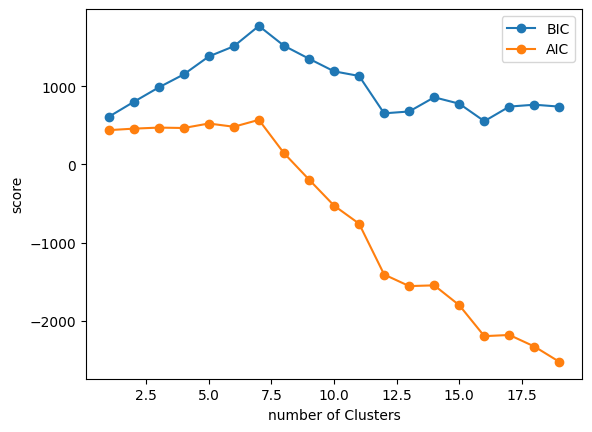

In [36]:
n_clusters_range = range(1, 20)
bics = []
aics = []

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(c_norm)
    bics.append(gmm.bic(c_norm))
    aics.append(gmm.aic(c_norm))

plt.plot(n_clusters_range, bics, label='BIC', marker='o')
plt.plot(n_clusters_range, aics, label='AIC', marker='o')
plt.xlabel('number of Clusters')
plt.ylabel('score')
plt.legend()
plt.show()

# I don't want to make the clusters too big , so I will pick 13
# but the lower the BIC and AIC the better!